In [1]:
import os
import requests
from PIL import Image
import numpy as np
import torch
from transformers import AutoProcessor, Pix2StructVisionModel

from PIL import Image

AttributeError: module 'dill' has no attribute 'extend'

## Pix2Struct

google/pix2struct-base

In [ ]:
from transformers import Pix2StructVisionConfig, Pix2StructVisionModel

# Initializing a Pix2StructConfig with google/pix2struct-base style configuration
configuration = Pix2StructVisionConfig()

# Initializing a Pix2StructForConditionalGeneration (with random weights) from the google/pix2struct-base style configuration
model = Pix2StructVisionModel(configuration)

# Accessing the model configuration
configuration = model.config

### Model Configuration

In [ ]:
configuration

Pix2StructVisionConfig {
  "attention_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.0,
  "hidden_size": 768,
  "initializer_factor": 1.0,
  "initializer_range": 1e-10,
  "layer_norm_eps": 1e-06,
  "model_type": "pix2struct_vision_model",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "patch_embed_hidden_size": 768,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "seq_len": 4096,
  "transformers_version": "4.31.0"
}

In [ ]:

image_processor = AutoProcessor.from_pretrained("google/pix2struct-textcaps-base")
model = Pix2StructVisionModel.from_pretrained("google/pix2struct-textcaps-base")

url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw)


def get_vision_embeddings(image):
        

    inputs = image_processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)

    last_hidden_states = outputs.last_hidden_state

    return last_hidden_states
# list(last_hidden_states.shape)


RuntimeError: Failed to import transformers.models.pix2struct.processing_pix2struct because of the following error (look up to see its traceback):
No module named 'transformers.models.pix2struct.processing_pix2struct'

In [ ]:
folder_path = '/Users/tejdavuluri/MSDS/isazi/baby_nutrition_updated_dataset/layout_v3'

# # List all files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

vision_embeddings_1000 =[]
num_images_to_load = 1000
for i in range(min(num_images_to_load, len(image_files))):
    image_file = image_files[i]
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    vision_embeddings_1000.append(get_vision_embeddings(image))
    if i % 50 ==0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [ ]:
all_embeddings = np.array(vision_embeddings_1000)
np.save('embeddings.npy', all_embeddings)

[tensor([[[-0.0690,  0.3830, -1.7586,  ..., -1.4918,  0.6738,  0.7479],
          [-0.2806,  0.7267, -1.6020,  ..., -1.4118,  0.9535,  0.4632],
          [-0.4136,  0.6821, -1.7023,  ..., -1.3895,  0.8286,  0.4016],
          ...,
          [-0.1791, -0.8067, -3.4524,  ..., -0.2994, -1.2578,  0.2126],
          [-0.1791, -0.8067, -3.4524,  ..., -0.2994, -1.2578,  0.2126],
          [-0.1791, -0.8067, -3.4524,  ..., -0.2994, -1.2578,  0.2126]]]),
 tensor([[[ 1.2540e-01,  2.0489e-01, -1.9842e+00,  ..., -1.7014e+00,
            7.3726e-03,  7.5291e-01],
          [ 6.9976e-02,  2.4776e-01, -1.8527e+00,  ..., -1.7970e+00,
            1.6529e-03,  4.4407e-01],
          [-2.8756e-02,  5.2146e-02, -2.2324e+00,  ..., -1.6616e+00,
            1.2493e-01,  3.0813e-01],
          ...,
          [-1.0113e+00, -1.6518e+00, -2.2823e+00,  ..., -2.6608e+00,
           -1.9874e-01,  4.9507e-01],
          [-1.0113e+00, -1.6518e+00, -2.2823e+00,  ..., -2.6608e+00,
           -1.9874e-01,  4.9507e-01],


(876, 1300, 3)


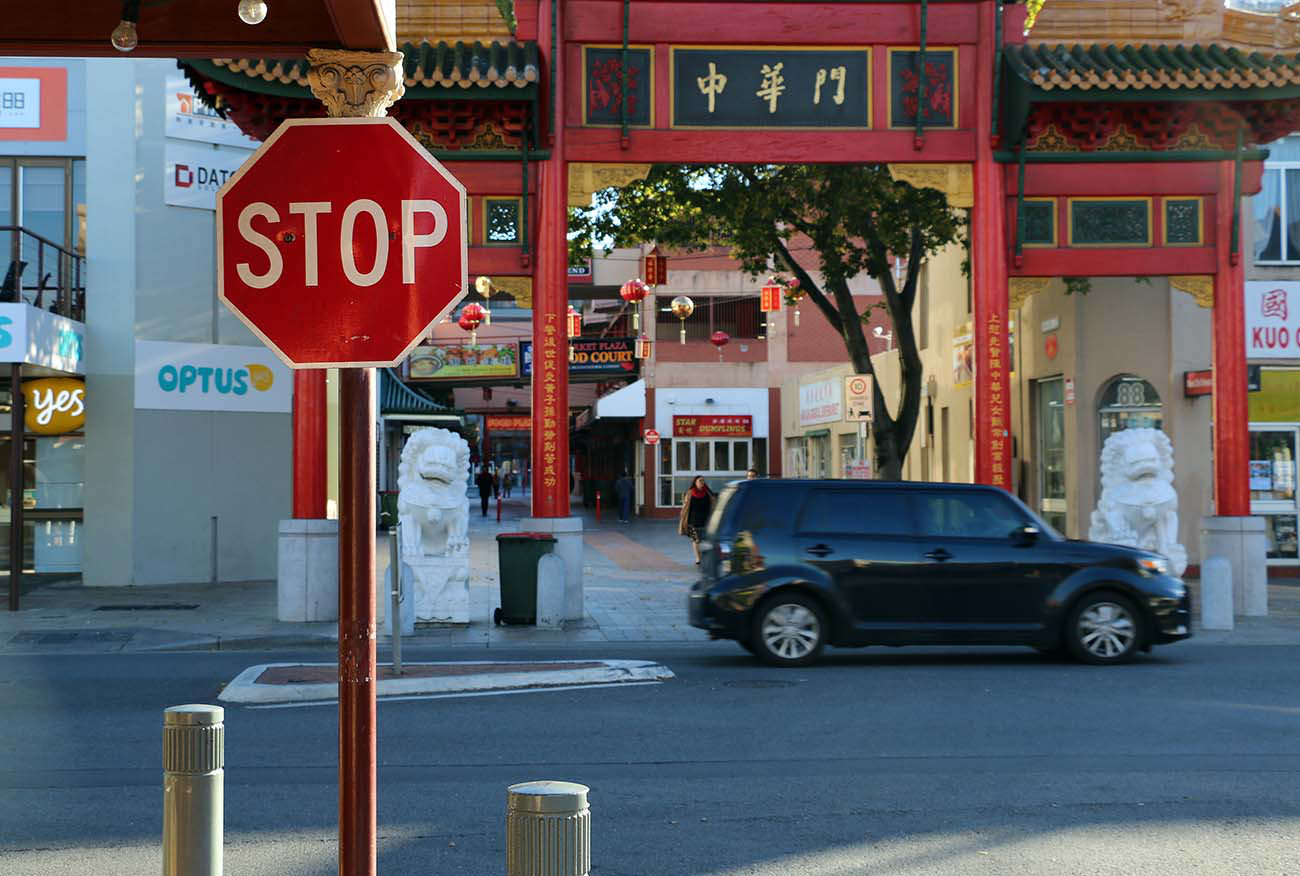

In [ ]:
print(np.array(image).shape)
image